In [1]:
# %% load necessary packages
import glob
import pandas as pd
import numpy as np
import gc
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Manipulation
Read in and merge datasets

In [11]:
files = glob.glob("../input" + "/accidents*.csv")
df = pd.DataFrame()
list_ = []
for file_ in files:
    print("read in", file_)
    df = pd.read_csv(file_, index_col=None)
    list_.append(df)

accident_df = pd.concat(list_, sort=False).reindex()
del list_
gc.collect()


# obtain the counting point of the accidents
def get_trailing_number(s):
    m = re.search(r'\d+$', s)
    return int(m.group()) if m else np.nan


accident_df['CP'] = pd.to_numeric(accident_df.Accident_Index.apply(get_trailing_number))

# merge with the UK traffic dataframe
print("read in ukTrafficAADF.csv")
traffic_df = pd.read_csv("../input/ukTrafficAADF.csv")

print("merge datasets")
acc_df = pd.merge(accident_df[accident_df['CP'] > 1000]
                   [['Year', 'CP', '1st_Road_Class', 'Road_Type', 'Speed_limit',
                       'Junction_Control', '2nd_Road_Class', 'Accident_Severity',
                       'Pedestrian_Crossing-Human_Control',
                       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
                       'Weather_Conditions', 'Road_Surface_Conditions',
                       'Special_Conditions_at_Site',
                       'Urban_or_Rural_Area']],
                   traffic_df[['AADFYear', 'CP', 'AllMotorVehicles']],
                   how='left', left_on=['Year', 'CP'], right_on=['AADFYear', 'CP'])

read in ../input/accidents_2009_to_2011.csv
read in ../input/accidents_2012_to_2014.csv
read in ../input/accidents_2005_to_2007.csv
read in ukTrafficAADF.csv
merge datasets


The level danger is defined as the accident severity devided by average daily vehicle number in that area

In [12]:
acc_df['danger'] = acc_df['Accident_Severity'] / acc_df['AllMotorVehicles']
acc_df = acc_df[np.isfinite(acc_df['danger'])]

log-transformation is needed fot the response

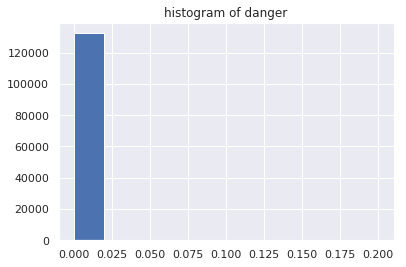

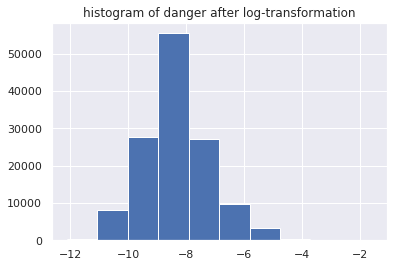

In [13]:
# log-transformation is needed fot the response
acc_df['danger'].hist()
plt.title('histogram of danger')
plt.show()

acc_df['danger_log'] = acc_df['danger'].transform(np.log)
acc_df['danger_log'].hist()
plt.title('histogram of danger after log-transformation')
plt.show()

## First Plot
The distribution of danger did not change over time

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


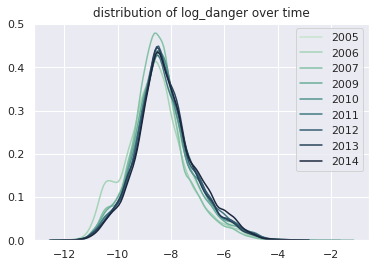

In [14]:
# %% 1st plot
# the distribution of response among different years
years = sorted(acc_df.Year.unique())
colors = sns.cubehelix_palette(len(years), rot=-0.4)
for i, year in enumerate(years):
    sns.kdeplot(acc_df[acc_df.Year == year]['danger_log'], color=colors[i], legend=False)
    plt.legend(years, loc='best')
plt.title('distribution of log_danger over time')
plt.show()

## Second Plot

Box plot of the dange level indicates that there is significant correlation between it and some of the predictors. The notch in the boxplot is the 95% confidence interval around the median. If the the notches of two categories do not overlap each other, the levels of danger between these two categorical are significantly different.

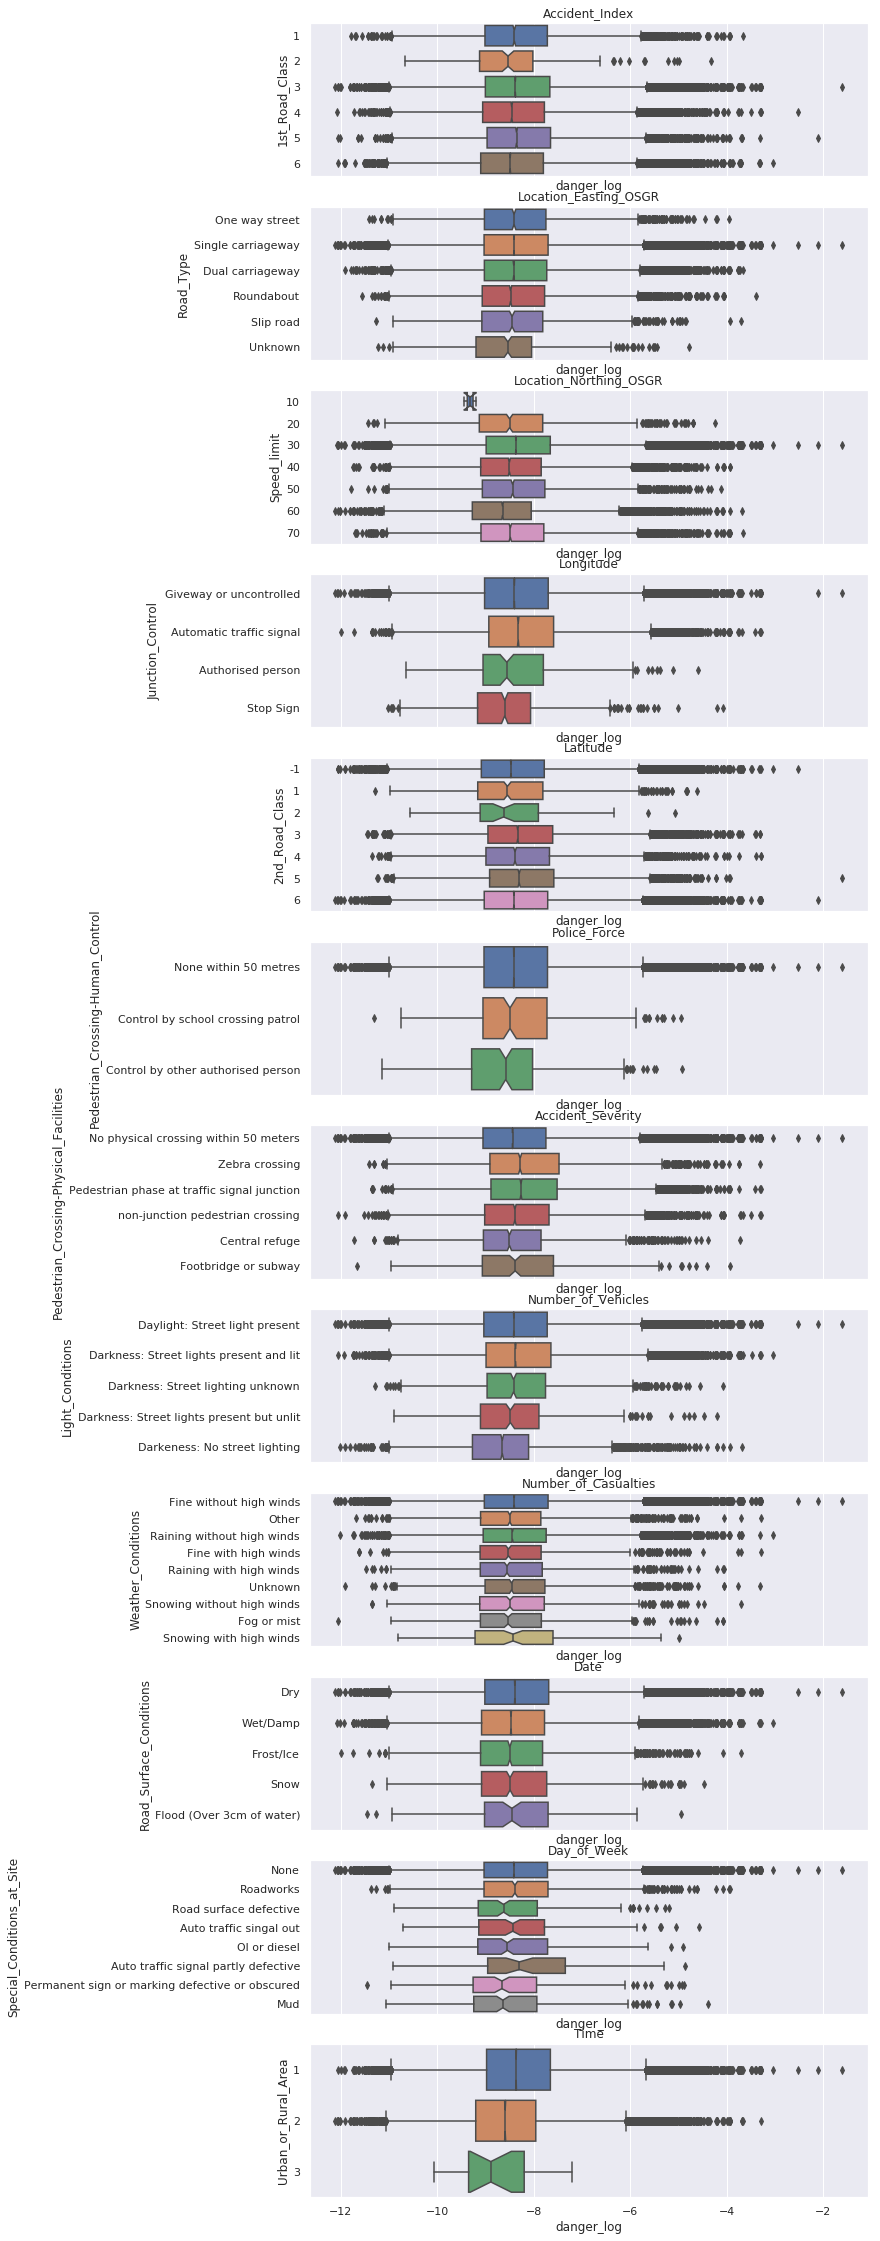

In [21]:
# %% 2nd plot
columns = ['1st_Road_Class', 'Road_Type', 'Speed_limit',
           'Junction_Control', '2nd_Road_Class',
            'Pedestrian_Crossing-Human_Control',
            'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
            'Weather_Conditions', 'Road_Surface_Conditions',
            'Special_Conditions_at_Site',
            'Urban_or_Rural_Area']
fig, axes = plt.subplots(nrows=12, figsize=(10, 40), sharex=True)
for i, ax in enumerate(axes.flatten()):
    if i >= len(columns):
        break
    # print(columns[i])

    sns.boxplot('danger_log', columns[i], data=acc_df, notch=True, orient='h', ax=ax)
    ax.set_title(df.columns[i])
plt.show()